# TS2: Sistema Lineales e Invariantes en el Tiempo

## Alumno: Felipe Berganza 


# RESUMEN 

En el TS2 abarcaremos la respuesta de varias senales de  entrada a diferentes sistemas LTI, donde buscaremos analizar dichas senales de entrada y sus respestivas respuetas al impulso aplicado. 

# INTRODUCCION 

## Ecuaciones de diferencias y Sistemas LTI
Las ecuaciones en diferencias son el equivalente en tiempo discreto de las ecuaciones diferenciales. Son herramientas matemáticas fundamentales que describen la relación entre una secuencia de entrada y una secuencia de salida, expresando cómo el valor actual de la salida depende de sus valores pasados y de los valores presentes y pasados de la entrada.
Un Sistema Lineal e Invariante en el Tiempo (LTI) es aquel que cumple con los principios de linealidad (superposición) e invariancia en el tiempo (su comportamiento no cambia con el tiempo).
La conexión crucial es que las ecuaciones en diferencias lineales con coeficientes constantes son la representación por excelencia de los sistemas LTI en tiempo discreto.





## Respuesta al impulso 

La respuesta al impulso, denotada como h[n], es la salida de un sistema LTI cuando la entrada es un impulso unitario δ[n]. Caracteriza completamente el sistema y permite determinar su comportamiento para cualquier entrada mediante la suma de convolución.  La estabilidad del sistema requiere que la suma absoluta de h[n] sea finita, y la causalidad exige que h[n] sea cero para n<0.

## CONSIGA 1 

1) Dada la siguiente ecuación en diferencias que modela un sistema LTI:

y[n]=3⋅10−2⋅x[n]+5⋅10−2⋅x[n−1]+3⋅10−2⋅x[n−2]+1.5⋅y[n−1]−0.5⋅y[n−2]

a. Graficar la señal de salida para cada una de las señales de entrada que generó en el TS1. Considere que las mismas son causales.

b. Hallar la respuesta al impulso y usando la misma, repetir la generación de la señal de salida para alguna de las señales de entrada consideradas en el punto anterior.

c. En cada caso indique la frecuencia de muestreo, el tiempo de simulación y la potencia o energía de la señal de salida.

## SENALES DE ENTRADA 



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros generales
fs = 44100  # Frecuencia de muestreo [Hz]
t_total = 0.01  # Tiempo total de simulación [s] (10 ms)
nn = int(fs * t_total)  # Número de muestras
Ts = 1/fs  # Tiempo entre muestras [s]
df = fs/nn

# Frecuencia fundamental
f1 = 2000  # 2 kHz

# Defino la funcion seno
def funcion_sen(vmax, dc, ff, ph, nn, fs):
    t_total = nn / fs  # Tiempo total de muestreo
    tt = np.linspace(0, t_total, nn, endpoint=False)  # Vector de tiempo
    
    # Creo la señal senoidal
    xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc
    
    return tt, xx

# Señal sinusoidal de 2kHz
tt, xx1 = funcion_sen(vmax=1, dc=0, ff=f1, ph=0, nn=nn, fs=fs)

# amplificada con un factor de 2 y desfasada en π/2 
tt, xx2 = funcion_sen(vmax=2, dc=0, ff=f1, ph=np.pi/2, nn=nn, fs=fs)

# Señal modulada en amplitud    
# Creo la señal moduladora (mitad de frecuencia)
tt, portadora = funcion_sen(vmax=1, dc=0, ff=f1/2, ph=0, nn=nn, fs=fs)
modulacion = xx1 * portadora

# Señal recortada al 75% de su potencia
# Calculo amplitud para 75% de potencia
amplitud_pico_original = np.max(np.abs(xx1))
potencia_original = (amplitud_pico_original**2) / 2
amplitud_pico_deseada = np.sqrt(2 * 0.75 * potencia_original)
# Recorto la señal
senal_recortada = np.clip(xx1, -amplitud_pico_deseada, amplitud_pico_deseada)

# Función para crear una onda cuadrada de 4kHz
def funcion_cuadrada(vmax, dc, ff, nn, fs):
    t_total = nn / fs
    tt = np.linspace(0, t_total, nn, endpoint=False)
    
    periodo = 1 / ff
    estado = (tt % periodo) < (0.5 * periodo)  # ciclo de trabajo de 50%
    xx = np.where(estado, vmax, -vmax) + dc
    
    return tt, xx

# Creo la onda cuadrada de 4kHz
tt, xx4 = funcion_cuadrada(vmax=1, dc=0, ff=4000, nn=nn, fs=fs)

# Función para crear un pulso rectangular de 10ms
def pulso_rectangular(amplitud, duracion_total, fs, duracion_pulso, inicio=0):
    nn = int(fs * duracion_total)
    tt = np.linspace(0, duracion_total, nn, endpoint=False)
    
    pulso = np.zeros_like(tt)
    mask_pulso = (tt >= inicio) & (tt <= inicio + duracion_pulso)
    pulso[mask_pulso] = amplitud
    
    return tt, pulso

# Genero el pulso de 10 ms con la misma frecuencia de muestreo
tt_pulso, pulso_10ms = pulso_rectangular(amplitud=1, duracion_total=0.03, fs=fs,duracion_pulso=0.01, inicio=0.005)


## Defino senales de salida y repuesta al impulso:


In [9]:
#Defino Los coeficientes de X con B y de Y con A
a = np.array([1.0, -1.5, 0.5])     # coeficientes de la salida
b = np.array([0.03, 0.05, 0.03])   # coeficientes de la entrada

# Calculo las salidas para cada senal de entrada
s_senoidal = signal.lfilter(b, a, xx1) # SENAL SENO 
s_senoidal_Amplificada = signal.lfilter(b, a, xx2) # SENAL SENO AMPLIFICADA Y DESFASADA
s_modulada = signal.lfilter(b, a, modulacion) # MODULACION EN AMPLITUD 
s_recortada = signal.lfilter(b, a, senal_recortada) # SENAL RECORTADA EN POTENCIA 
s_cuadrada = signal.lfilter(b, a, xx4) # SENAL CUADRADA 
s_pulso = signal.lfilter(b, a, pulso_10ms) # PULSO RECTANGULAR 

# Calculo la respuesta al impulso Delta
impulso = np.zeros(nn)  
impulso[0] = 1.0
h = signal.lfilter(b, a, impulso)

# Usamos la convolución para obtener la salida
salida_convolucion = np.convolve(xx1, h)[:nn]  

## Graficos de las repuestas calculadas 

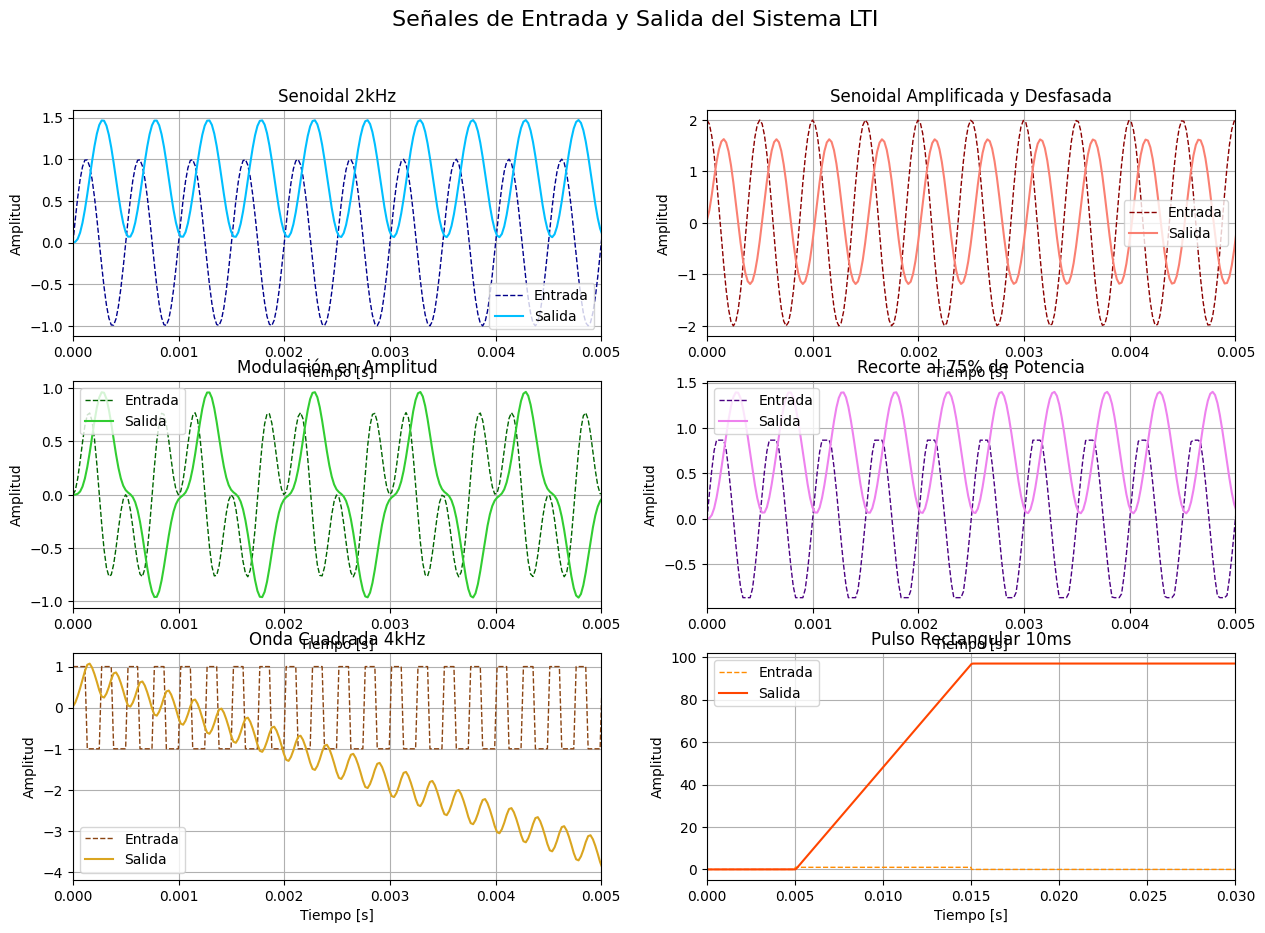

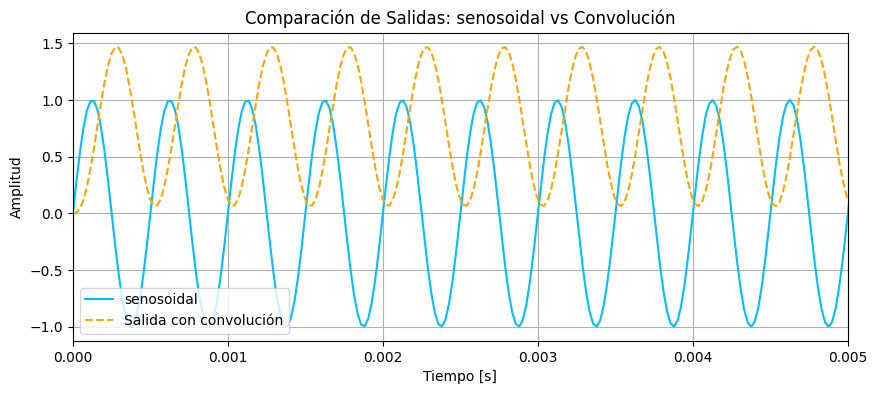

<Figure size 640x480 with 0 Axes>

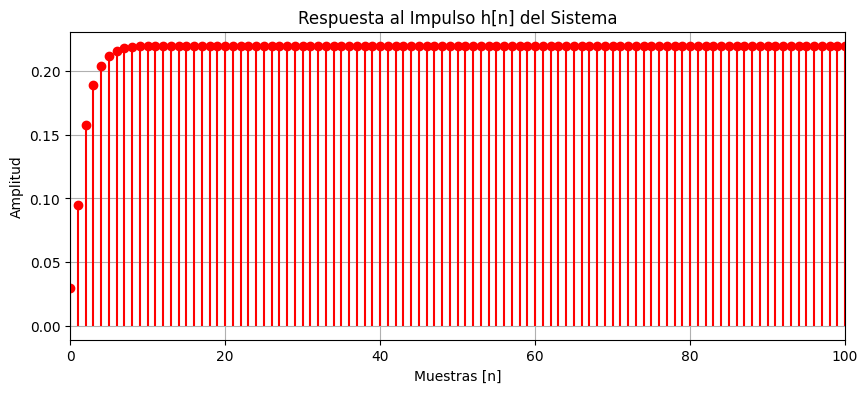

In [10]:
# ---------------------------------------------------------------
# GRÁFICAS DE LAS SEÑALES DE SALIDA
# ---------------------------------------------------------------
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Señales de Entrada y Salida del Sistema LTI', fontsize=16)

# 1. Señal senoidal
axes[0, 0].plot(tt, xx1, color='darkblue', linestyle='--', label='Entrada', linewidth=1)
axes[0, 0].plot(tt, s_senoidal, color='deepskyblue', label='Salida', linewidth=1.5)
axes[0, 0].set_title('Senoidal 2kHz')
axes[0, 0].set_xlabel('Tiempo [s]')
axes[0, 0].set_ylabel('Amplitud')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_xlim(0, 0.005)

# 2. Señal senoidal amplificada y desfasada
axes[0, 1].plot(tt, xx2, color='darkred', linestyle='--', label='Entrada', linewidth=1)
axes[0, 1].plot(tt, s_senoidal_Amplificada, color='salmon', label='Salida', linewidth=1.5)
axes[0, 1].set_title('Senoidal Amplificada y Desfasada')
axes[0, 1].set_xlabel('Tiempo [s]')
axes[0, 1].set_ylabel('Amplitud')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_xlim(0, 0.005)

# 3. Señal modulada en amplitud
axes[1, 0].plot(tt, modulacion, color='darkgreen', linestyle='--', label='Entrada', linewidth=1)
axes[1, 0].plot(tt, s_modulada, color='limegreen', label='Salida', linewidth=1.5)
axes[1, 0].set_title('Modulación en Amplitud')
axes[1, 0].set_xlabel('Tiempo [s]')
axes[1, 0].set_ylabel('Amplitud')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].set_xlim(0, 0.005)

# 4. Señal recortada
axes[1, 1].plot(tt, senal_recortada, color='indigo', linestyle='--', label='Entrada', linewidth=1)
axes[1, 1].plot(tt, s_recortada, color='violet', label='Salida', linewidth=1.5)
axes[1, 1].set_title('Recorte al 75% de Potencia')
axes[1, 1].set_xlabel('Tiempo [s]')
axes[1, 1].set_ylabel('Amplitud')
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].set_xlim(0, 0.005)

# 5. Señal cuadrada
axes[2, 0].plot(tt, xx4, color='saddlebrown', linestyle='--', label='Entrada', linewidth=1)
axes[2, 0].plot(tt, s_cuadrada, color='goldenrod', label='Salida', linewidth=1.5)
axes[2, 0].set_title('Onda Cuadrada 4kHz')
axes[2, 0].set_xlabel('Tiempo [s]')
axes[2, 0].set_ylabel('Amplitud')
axes[2, 0].legend()
axes[2, 0].grid(True)
axes[2, 0].set_xlim(0, 0.005)

# 6. Pulso rectangular
axes[2, 1].plot(tt_pulso, pulso_10ms, color='darkorange', linestyle='--', label='Entrada', linewidth=1)
axes[2, 1].plot(tt_pulso, s_pulso, color='orangered', label='Salida', linewidth=1.5)
axes[2, 1].set_title('Pulso Rectangular 10ms')
axes[2, 1].set_xlabel('Tiempo [s]')
axes[2, 1].set_ylabel('Amplitud')
axes[2, 1].legend()
axes[2, 1].grid(True)
axes[2, 1].set_xlim(0, 0.03)

# 7. Grafico de convolucion de H (impulso) con la senoidal 
plt.figure(figsize=(10, 4))
plt.plot(tt, xx1, label='senosoidal', color='deepskyblue')
plt.plot(tt, salida_convolucion, label='Salida con convolución', color='orange', linestyle='--')
plt.title('Comparación de Salidas: senosoidal vs Convolución')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.xlim(0, 0.005)
plt.show()

plt.tight_layout()
plt.show()



# ---------------------------------------------------------------
# GRÁFICA DE LA RESPUESTA AL IMPULSO
# ---------------------------------------------------------------

plt.figure(figsize=(10, 4))
n_samples = np.arange(len(h))  # Usar la longitud real de h
plt.stem(n_samples, h, 'r', basefmt=" ")
plt.title('Respuesta al Impulso h[n] del Sistema')
plt.xlabel('Muestras [n]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.xlim(0, 100)  # Primeras 100 muestras
plt.show()

## Calculo de frecuencia de muestreo, el tiempo de simulación y la potencia o energía de la señal de salida.

In [8]:
# ---------------------------------------------------------------
# CÁLCULO DE ENERGÍA/POTENCIA
# ---------------------------------------------------------------

def calcular_energia(senal):
    return np.sum(senal**2)

def calcular_potencia(senal):
    return np.mean(senal**2)

print("=== ENERGÍA/POTENCIA DE LAS SEÑALES DE SALIDA ===")
print(f"Señal senoidal - Energía: {calcular_energia(s_senoidal):.6f}")
print(f"Señal senoidal amplificada - Energía: {calcular_energia(s_senoidal_Amplificada):.6f}")
print(f"Señal modulada - Energía: {calcular_energia(s_modulada):.6f}")
print(f"Señal recortada - Energía: {calcular_energia(s_recortada):.6f}")
print(f"Señal cuadrada - Potencia: {calcular_potencia(s_cuadrada):.6f}")
print(f"Pulso rectangular - Energía: {calcular_energia(s_pulso):.6f}")
print(f"Respuesta al impulso - Energía: {calcular_energia(h):.6f}")

# ---------------------------------------------------------------
# INFORMACIÓN DEL SISTEMA - 
# ---------------------------------------------------------------

print("\n=== INFORMACIÓN DEL SISTEMA ===")
print(f"Frecuencia de muestreo: {fs} Hz")
print(f"Tiempo de simulación: {nn/fs:.3f} segundos")  
print(f"Resolución espectral: {df:.3f} Hz")  
print(f"Tiempo de sampling: {Ts:.6f} segundos") 


=== ENERGÍA/POTENCIA DE LAS SEÑALES DE SALIDA ===
Señal senoidal - Energía: 368.271799
Señal senoidal amplificada - Energía: 457.571448
Señal modulada - Energía: 134.995027
Señal recortada - Energía: 331.654840
Señal cuadrada - Potencia: 3.574951
Pulso rectangular - Energía: 7591437.435467
Respuesta al impulso - Energía: 21.207733

=== INFORMACIÓN DEL SISTEMA ===
Frecuencia de muestreo: 44100 Hz
Tiempo de simulación: 0.010 segundos
Resolución espectral: 100.000 Hz
Tiempo de sampling: 0.000023 segundos


# CONCLUSION

Las gráficas generadas y los cálculos realizados evidencian que el sistema actúa como un filtro que modifica la amplitud y forma de las señales, respetando los principios de linealidad y tiempo invarianza. Además, se observó cómo señales con mayor amplitud o contenido espectral más complejo (como la onda cuadrada o la señal modulada) generan respuestas más intensas o con mayor energía. El gráfico de 'Comparación de Salidas: senosoidal vs Convolución' compara la señal senoidal de entrada con la salida obtenida mediante la convolución con la respuesta al impulso h[n]. Esta comparación permite verificar que:
- La salida generada por convolución reproduce fielmente el comportamiento del sistema ante la entrada senoidal.
- La forma, amplitud y fase de la señal de salida son coherentes con las obtenidas previamente mediante el filtro digital (lfilter), lo que confirma que el sistema es lineal e invariante en el tiempo.
- La convolución actúa como una herramienta fundamental para predecir la respuesta del sistema ante cualquier señal, siempre que se conozca su respuesta al impulso.




## CONSIGNA 2

2) Hallar la respuesta al impulso y la salida correspondiente a una señal de entrada senoidal en los sistemas definidos mediante las siguientes ecuaciones en diferencias:

- y[n]=x[n]+3⋅x[n−10]

- y[n]=x[n]+3⋅y[n−10]

## Sistema 1

🔹 Respuesta al impulso
de este sistema es no recursivo (FIR), ya que depende solo de entradas pasadas. Si aplicamos un impulso unitario x[n] = delta[n], la salida será:


In [19]:
# Impulso unitario
impulso = np.zeros(nn)
impulso[0] = 1.0

# Sistema 1: y[n] = x[n] + 3·x[n−10]
b1 = np.array([1.0] + [0]*9 + [3.0])
a1 = np.array([1.0])
h1 = signal.lfilter(b1, a1, impulso)
y1_sen = signal.lfilter(b1, a1, xx1)

## Sistema 2

🔹 Respuesta al impulso
Este sistema es recursivo (IIR), ya que depende de salidas pasadas. Uso:


In [20]:
# Sistema 2: y[n] = x[n] + 3·y[n−10]
b2 = np.array([1.0])
a2 = np.array([1.0] + [0]*9 + [-3.0])
h2 = signal.lfilter(b2, a2, impulso)
y2_sen = signal.lfilter(b2, a2, xx1)



## Graficamos ambos sistemas 

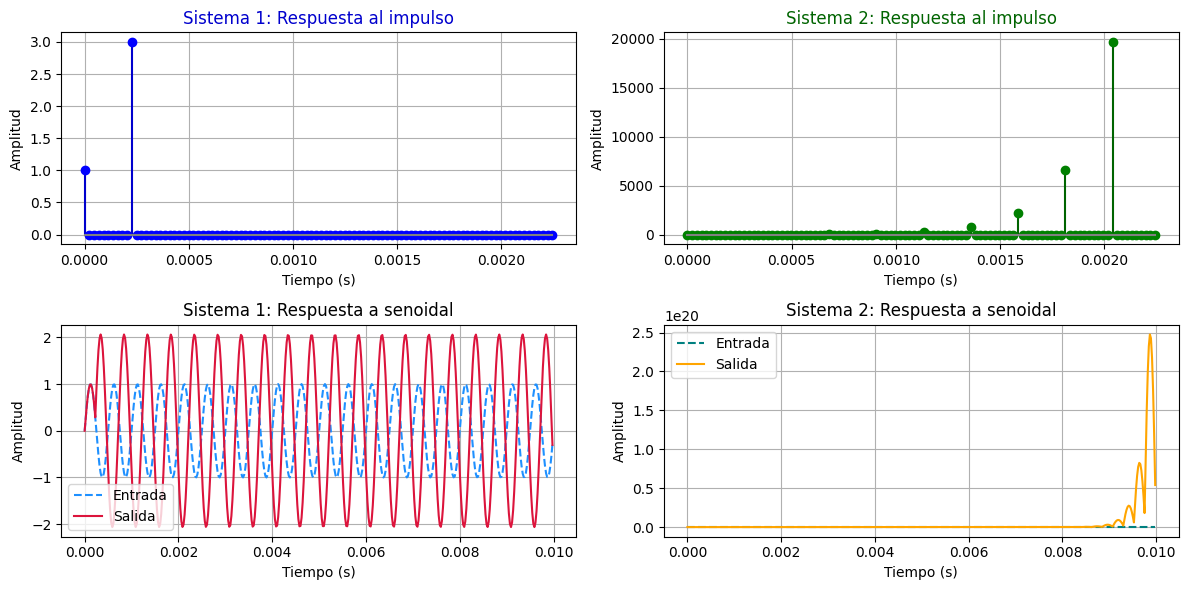

In [21]:
# Gráficas con estilo personalizado
plt.figure(figsize=(12, 6))

# Respuesta al impulso - Sistema 1
plt.subplot(2, 2, 1)
plt.stem(tt[:100], h1[:100], linefmt='mediumblue', markerfmt='bo', basefmt='gray')
plt.title('Sistema 1: Respuesta al impulso', fontsize=12, color='mediumblue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Respuesta al impulso - Sistema 2
plt.subplot(2, 2, 2)
plt.stem(tt[:100], h2[:100], linefmt='darkgreen', markerfmt='go', basefmt='gray')
plt.title('Sistema 2: Respuesta al impulso', fontsize=12, color='darkgreen')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Respuesta a senoidal - Sistema 1
plt.subplot(2, 2, 3)
plt.plot(tt, xx1, color='dodgerblue', linestyle='--', label='Entrada')
plt.plot(tt, y1_sen, color='crimson', linewidth=1.5, label='Salida')
plt.title('Sistema 1: Respuesta a senoidal', fontsize=12)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Respuesta a senoidal - Sistema 2
plt.subplot(2, 2, 4)
plt.plot(tt, xx1, color='teal', linestyle='--', label='Entrada')
plt.plot(tt, y2_sen, color='orange', linewidth=1.5, label='Salida')
plt.title('Sistema 2: Respuesta a senoidal', fontsize=12)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## CONCLUSION

- El Sistema 1 tiene una respuesta al impulso finita y es más fácil de analizar. Su salida es una combinación directa de la señal actual y una versión retrasada.
- El Sistema 2 tiene una respuesta al impulso infinita, lo que puede generar efectos acumulativos o resonancias dependiendo de la señal de entrada.
- Ambos sistemas responden de forma distinta ante la misma señal senoidal, lo que demuestra cómo la estructura de la ecuación en diferencias afecta el comportamiento dinámico del sistema.
